### Performance comparison of goal switching algorithm to non-goal switching variant

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
import time
import pickle
from itertools import product
from functools import reduce
import numba
from numba import jit

sys.path.append("C:/Users/lheindrich/Documents/Scalable-discovery/metacontroller/")
os.chdir("C:/Users/lheindrich/Documents/Scalable-discovery/metacontroller/")
from utils.distributions import Normal, Categorical, cross, expectation
import vanilla_BMPS
import metacontroller
import hierarchical
#from utils.mouselab_metacontroller import MouselabMeta
from utils.mouselab_VAR import MouselabVar
from utils.mouselab_metacontroller import MouselabMeta
import utils.mouselab 
import utils.experiment_creation

In [2]:
SWITCH_COST = 0 # Cost of switching goals
HIGH_COST = 10 # Cost of computing a goal
LOW_COST = 10  # Cost of computing a low level node
SEED = 0 # Fixes generated environments for training
COST_FUNC = "Hierarchical"
assert COST_FUNC in ["Basic", "Hierarchical", "Actionweight", "Novpi", "Proportional", "Independentweight"]

BO_RESTARTS = 10
BO_STEPS = 100
EVAL_EPISODES = 100

### High risk

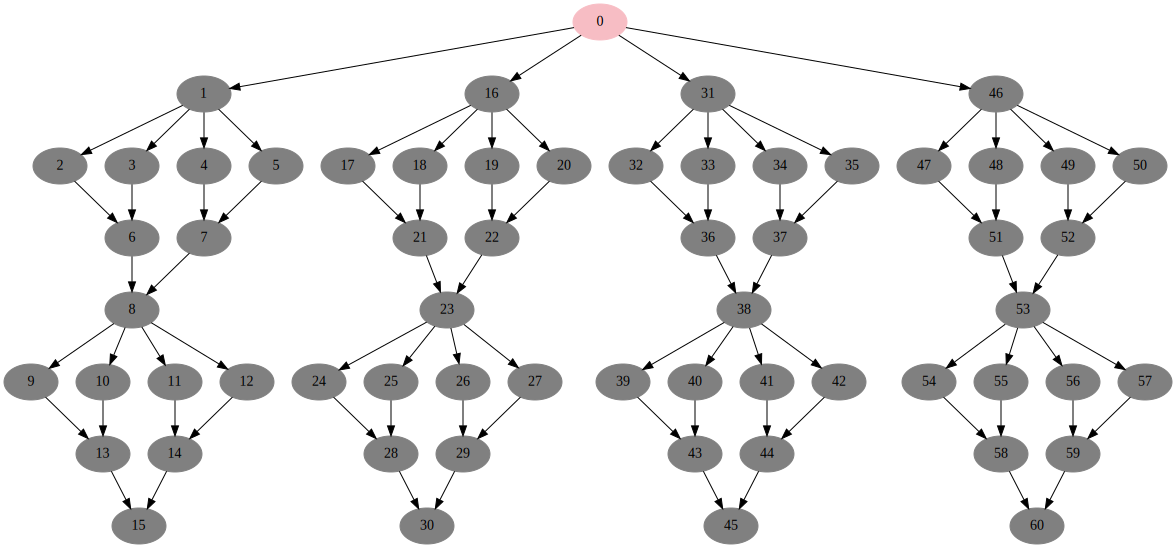

In [3]:
TREE = [[1, 16, 31, 46], [2, 3, 4, 5], [6], [6], [7], [7], [8], [8], [9, 10, 11, 12], [13], [13], [14], [14], [15], [15], [], [17, 18, 19, 20], [21], [21], [22], [22], [23], [23], [24, 25, 26, 27], [28], [28], [29], [29], [30], [30], [], [32, 33, 34, 35], [36], [36], [37], [37], [38], [38], [39, 40, 41, 42], [43], [43], [44], [44], [45], [45], [], [47, 48, 49, 50], [51], [51], [52], [52], [53], [53], [54, 55, 56, 57], [58], [58], [59], [59], [60], [60], []]
d0 = Categorical([0])
dr = Categorical([-1500, 0], probs=[0.1, 0.9])
di = Categorical([-10, -5, 5, 10])
dg = Categorical([0, 25, 75, 100])
node_types = [di, d0, di, di, di, di, di, di, dr, di, di, di, di, di, di, dg, d0, di, di, di, di, di, di, dr, di, di, di, di, di, di, dg, d0, di, di, di, di, di, di, dr, di, di, di, di, di, di, dg, d0, di, di, di, di, di, di, dr, di, di, di, di, di, di, dg]

INIT = tuple([r for r in node_types])

GOAL_NODES = sum([int(el == []) for el in TREE])
LOW_NODES = int((len(TREE)-1)/GOAL_NODES)
#print("Goal nodes", GOAL_NODES, "low nodes", LOW_NODES)

env = MouselabMeta(TREE, INIT)
env._render()

In [34]:
W_vanilla, time_vanilla = vanilla_BMPS.optimize(TREE=TREE, INIT=INIT, LOW_COST=LOW_COST, SEED=SEED, samples=BO_RESTARTS, iterations=BO_STEPS, evaluated_episodes=EVAL_EPISODES, cost_function="Basic")

rewards_vanilla, actions_vanilla = vanilla_BMPS.eval(W_vanilla, n=500, TREE=TREE, INIT=INIT, LOW_COST=LOW_COST, SEED=SEED+1000, cost_function="Basic", exact_seed=True)

Basic
Weights [[ 0.12696983  0.37301223 51.32108708]]


KeyboardInterrupt: 

In [5]:
W_disabled, time_disabled = metacontroller.optimize(TREE=TREE, INIT=INIT, LOW_COST=LOW_COST, HIGH_COST=HIGH_COST, SWITCH_COST=SWITCH_COST, SEED=SEED, low_nodes=LOW_NODES, goal_nodes=GOAL_NODES, samples=BO_RESTARTS, iterations=BO_STEPS, evaluated_episodes=EVAL_EPISODES, disable_meta=True, cost_function=COST_FUNC)

rewards_disabled, actions_disabled = metacontroller.eval(W_disabled, n=500, TREE=TREE, INIT=INIT, HIGH_COST=HIGH_COST, LOW_COST=LOW_COST, SWITCH_COST=SWITCH_COST, SEED=SEED+1000, disable_meta=True, cost_function=COST_FUNC)

Testing weights: [ 0.12696983  0.37301223 12.94059693  0.9195404   2.387063  ]
Average reward -100.0
Testing weights: [0.26047601 0.12944068 3.04718126 0.86154929 2.20339367]
Average reward -100.0
Testing weights: [0.33622174 0.35205354 1.85777947 0.34352588 3.10655308]
Average reward -100.0
Testing weights: [0.45137647 0.2288873  9.26596405 0.17091717 2.24210099]
Average reward -100.0
Testing weights: [0.12310214 0.59478359 5.76622912 0.64166617 2.78777596]
Average reward -100.0
Testing weights: [ 0.5430262   0.13755356 14.78620235  0.27459243  1.59959279]
Average reward -100.0
Testing weights: [ 0.09973676  0.56065718 13.07652576  0.61937849  1.74931631]
Average reward -100.0
Testing weights: [0.01654451 0.13876812 2.19992457 0.67239782 3.44963677]
Average reward -100.0
Testing weights: [0.4813845  0.09446113 8.92543536 0.80998032 1.13304529]
Average reward -87.15
Testing weights: [0.49730633 0.13409924 7.68436224 0.54475875 1.08965989]
Average reward -90.25
Testing weights: [0.49696

In [6]:
W_meta, time_meta = metacontroller.optimize(TREE=TREE, INIT=INIT, LOW_COST=LOW_COST, HIGH_COST=HIGH_COST, SWITCH_COST=SWITCH_COST, SEED=SEED, low_nodes=LOW_NODES, goal_nodes=GOAL_NODES, samples=BO_RESTARTS, iterations=BO_STEPS, evaluated_episodes=EVAL_EPISODES, disable_meta=False, cost_function=COST_FUNC)

rewards_meta, actions_meta = metacontroller.eval(W_meta, n=500, TREE=TREE, INIT=INIT, HIGH_COST=HIGH_COST, LOW_COST=LOW_COST, SWITCH_COST=SWITCH_COST, SEED=SEED+1000, disable_meta=False, cost_function=COST_FUNC)

Testing weights: [ 0.12696983  0.37301223 12.94059693  0.9195404   2.387063  ]
Average reward -100.0
Testing weights: [0.26047601 0.12944068 3.04718126 0.86154929 2.20339367]
Average reward -100.0
Testing weights: [0.33622174 0.35205354 1.85777947 0.34352588 3.10655308]
Average reward -100.0
Testing weights: [0.45137647 0.2288873  9.26596405 0.17091717 2.24210099]
Average reward -100.0
Testing weights: [0.12310214 0.59478359 5.76622912 0.64166617 2.78777596]
Average reward -100.0
Testing weights: [ 0.5430262   0.13755356 14.78620235  0.27459243  1.59959279]
Average reward -100.0
Testing weights: [ 0.09973676  0.56065718 13.07652576  0.61937849  1.74931631]
Average reward -100.0
Testing weights: [0.01654451 0.13876812 2.19992457 0.67239782 3.44963677]
Average reward -100.0
Testing weights: [0.4813845  0.09446113 8.92543536 0.80998032 1.13304529]
Average reward -87.15
Testing weights: [0.49730633 0.13409924 7.68436224 0.54475875 1.08965989]
Average reward -90.25
Testing weights: [0.49696

In [4]:
W_vanilla = np.array([[0.26047601, 0.12944068, 9.62740672]])
W_meta = np.array([[ 1, 0, 10.53984277,  0.66580626,  1]])
W_disabled = np.array([[0.4813845,  0.09446113, 8.92543536, 0.80998032, 1.13304529]])

In [6]:
print("Hierarchical")
rewards_disabled, actions_disabled = metacontroller.eval(W_disabled, n=5000, TREE=TREE, INIT=INIT, HIGH_COST=HIGH_COST, LOW_COST=LOW_COST, SWITCH_COST=SWITCH_COST, SEED=SEED+1000, disable_meta=True, cost_function=COST_FUNC)
print("Meta")
rewards_meta, actions_meta = metacontroller.eval(W_meta, n=5000, TREE=TREE, INIT=INIT, HIGH_COST=HIGH_COST, LOW_COST=LOW_COST, SWITCH_COST=SWITCH_COST, SEED=SEED+1000, disable_meta=False, cost_function=COST_FUNC)
print("Vanilla")
rewards_vanilla, actions_vanilla = vanilla_BMPS.eval(W_vanilla, n=5000, TREE=TREE, INIT=INIT, LOW_COST=LOW_COST, SEED=SEED+1000, cost_function="Basic", exact_seed=True)

Hierarchical
Seconds: 108.2920401096344
Average reward: -80.38
Meta
Seconds: 207.7489116191864
Average reward: 51.3275
Vanilla
Seconds: 1458.7311749458313
Average reward: 39.2875


In [8]:
import scipy.stats

print("Hierarchical:", np.mean(rewards_disabled), np.std(rewards_disabled))
print("Meta:", np.mean(rewards_meta), np.std(rewards_meta))
print("Vanilla:", np.mean(rewards_vanilla), np.std(rewards_vanilla))

print("Hierarchical normal distribution test", scipy.stats.shapiro(rewards_disabled))
print("Meta normal distribution test", scipy.stats.shapiro(rewards_meta))
print("Vanilla normal distribution test", scipy.stats.shapiro(rewards_meta))

print("Comparison hier - meta", scipy.stats.ranksums(rewards_disabled, rewards_meta))
print("Comparison hier - vanilla", scipy.stats.ranksums(rewards_disabled, rewards_vanilla))
print("Comparison vanilla - meta", scipy.stats.ranksums(rewards_meta, rewards_vanilla))

Hierarchical: -80.38 446.47138273354096
Meta: 51.3275 32.204477464321634
Vanilla: 39.2875 40.92785382535957
Hierarchical normal distribution test ShapiroResult(statistic=0.3962758779525757, pvalue=0.0)
Meta normal distribution test ShapiroResult(statistic=0.8628172874450684, pvalue=0.0)
Vanilla normal distribution test ShapiroResult(statistic=0.8628172874450684, pvalue=0.0)
Comparison hier - meta RanksumsResult(statistic=14.072631817893189, pvalue=5.594788196805272e-45)
Comparison hier - vanilla RanksumsResult(statistic=18.699047691856975, pvalue=5.03967306285568e-78)
Comparison vanilla - meta RanksumsResult(statistic=11.382295601708977, pvalue=5.1233097065467175e-30)


### 2_36

Goal nodes 2 low nodes 18


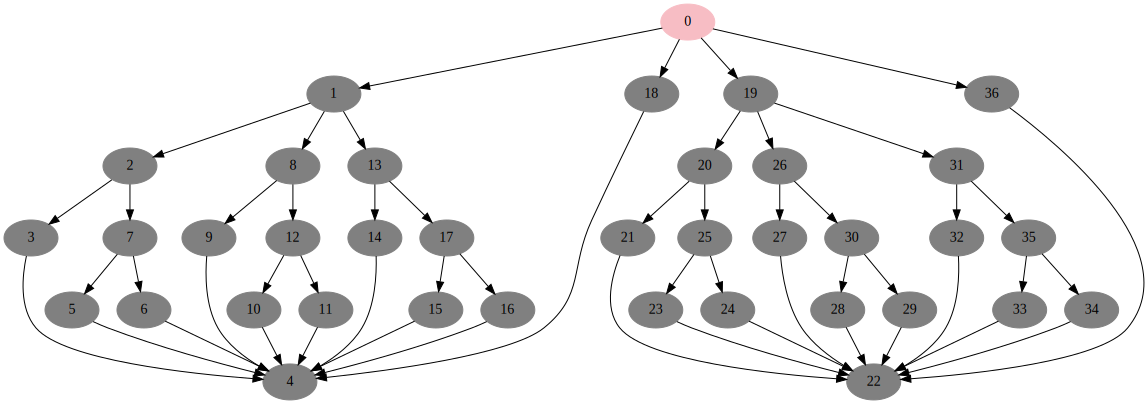

In [19]:
TREE = [[1, 18, 19, 36], [2, 8, 13], [3, 7], [4], [], [4], [4], [5, 6], [9, 12], [4], [4], [4], [10, 11], [14, 17], [4], [4], [4], [15, 16], [4], [20, 26, 31], [21, 25], [22], [], [22], [22], [23, 24], [27, 30], [22], [22], [22], [28, 29], [32, 35], [22], [22], [22], [33, 34], [22]]
dist = ['V1', 'V1', 'V2', 'V3', 'G1', 'V4', 'V4', 'V3', 'V2', 'V3', 'V4', 'V4', 'V3', 'V2', 'V3', 'V4', 'V4', 'V3', 'V1', 'V1', 'V2', 'V3', 'G2', 'V4', 'V4', 'V3', 'V2', 'V3', 'V4', 'V4', 'V3', 'V2', 'V3', 'V4', 'V4', 'V3', 'V1']
sigma_val = {'V1': 5, 'V2': 10, 'V3': 20, 'V4': 40, 'G1': 100, 'G2': 120, 'G3': 140, 'G4': 160, 'G5': 180}
INIT = tuple([Normal(mu=0, sigma=sigma_val[d]) for d in dist])
GOAL_NODES = sum([int(el == []) for el in TREE])
LOW_NODES = int((len(TREE)-1)/GOAL_NODES)
print("Goal nodes", GOAL_NODES, "low nodes", LOW_NODES)
env = MouselabMeta(TREE, INIT)
env._render()

In [20]:
W_disabled, time_disabled = metacontroller.optimize(TREE=TREE, INIT=INIT, LOW_COST=LOW_COST, HIGH_COST=HIGH_COST, SWITCH_COST=SWITCH_COST, SEED=SEED, low_nodes=LOW_NODES, goal_nodes=GOAL_NODES, samples=BO_RESTARTS, iterations=BO_STEPS, evaluated_episodes=EVAL_EPISODES, disable_meta=True, cost_function=COST_FUNC)

Testing weights: [ 0.12696983  0.37301223 15.49929628  0.9195404   1.46235433]
Average reward 65.22506140700416
Testing weights: [0.26047601 0.12944068 3.48586295 0.86154929 1.40113122]
Average reward 105.36369532585628
Testing weights: [0.33622174 0.35205354 2.04158936 0.34352588 1.70218436]
Average reward 108.30722546547253
Testing weights: [ 0.45137647  0.2288873  11.03724206  0.17091717  1.41403366]
Average reward 65.22506140700416
Testing weights: [0.12310214 0.59478359 6.78756394 0.64166617 1.59592532]
Average reward 65.22506140700416
Testing weights: [ 0.5430262   0.13755356 17.74038857  0.27459243  1.19986426]
Average reward 65.22506140700416
Testing weights: [ 0.09973676  0.56065718 15.66435271  0.61937849  1.2497721 ]
Average reward 65.22506140700416
Testing weights: [0.01654451 0.13876812 2.45705126 0.67239782 1.81654559]
Average reward 104.61867744057594
Testing weights: [ 0.4813845   0.09446113 10.62374294  0.80998032  1.04434843]
Average reward 65.22506140700416
Testing w

In [21]:
W_meta, time_meta = metacontroller.optimize(TREE=TREE, INIT=INIT, LOW_COST=LOW_COST, HIGH_COST=HIGH_COST, SWITCH_COST=SWITCH_COST, SEED=SEED, low_nodes=LOW_NODES, goal_nodes=GOAL_NODES, samples=BO_RESTARTS, iterations=BO_STEPS, evaluated_episodes=EVAL_EPISODES, disable_meta=False, cost_function=COST_FUNC)

Testing weights: [ 0.12696983  0.37301223 15.49929628  0.9195404   1.46235433]
Average reward 65.22506140700416
Testing weights: [0.26047601 0.12944068 3.48586295 0.86154929 1.40113122]
Average reward 105.3363838447603
Testing weights: [0.33622174 0.35205354 2.04158936 0.34352588 1.70218436]
Average reward 107.75269587888062
Testing weights: [ 0.45137647  0.2288873  11.03724206  0.17091717  1.41403366]
Average reward 65.22506140700416
Testing weights: [0.12310214 0.59478359 6.78756394 0.64166617 1.59592532]
Average reward 65.22506140700416
Testing weights: [ 0.5430262   0.13755356 17.74038857  0.27459243  1.19986426]
Average reward 65.22506140700416
Testing weights: [ 0.09973676  0.56065718 15.66435271  0.61937849  1.2497721 ]
Average reward 65.22506140700416
Testing weights: [0.01654451 0.13876812 2.45705126 0.67239782 1.81654559]
Average reward 104.6053108570786
Testing weights: [ 0.4813845   0.09446113 10.62374294  0.80998032  1.04434843]
Average reward 65.22506140700416
Testing wei

In [22]:
print("Hierarchical")
rewards_disabled, actions_disabled = metacontroller.eval(W_disabled, n=5000, TREE=TREE, INIT=INIT, HIGH_COST=HIGH_COST, LOW_COST=LOW_COST, SWITCH_COST=SWITCH_COST, SEED=SEED+1000, disable_meta=True, cost_function=COST_FUNC)
print("Meta")
rewards_meta, actions_meta = metacontroller.eval(W_meta, n=5000, TREE=TREE, INIT=INIT, HIGH_COST=HIGH_COST, LOW_COST=LOW_COST, SWITCH_COST=SWITCH_COST, SEED=SEED+1000, disable_meta=False, cost_function=COST_FUNC)

Hierarchical
Seconds: 1059.1132981777191
Average reward: 108.83765198674689
Meta
Seconds: 1777.7203187942505
Average reward: 108.78432344101866


In [23]:
import scipy.stats

print("Hierarchical:", np.mean(rewards_disabled), np.std(rewards_disabled))
print("Meta:", np.mean(rewards_meta), np.std(rewards_meta))

print("Hierarchical normal distribution test", scipy.stats.shapiro(rewards_disabled))
print("Meta normal distribution test", scipy.stats.shapiro(rewards_meta))

print("Comparison", scipy.stats.ranksums(rewards_disabled, rewards_meta))

Hierarchical: 108.83765198674689 95.37217562793072
Meta: 108.78432344101866 95.36516509702349
Hierarchical normal distribution test ShapiroResult(statistic=0.9971420764923096, pvalue=3.921841340570609e-08)
Meta normal distribution test ShapiroResult(statistic=0.9971035718917847, pvalue=3.225123634820193e-08)
Comparison RanksumsResult(statistic=0.02650251636472721, pvalue=0.9788565265364988)
